In [81]:
import pandas as pd
import matplotlib.pyplot as plt
# import sqlite3
# from sqlalchemy import create_engine
import numpy as np
import itkwidgets
# import pathlib
from ccfwidget import CCFWidget
# import ipywidgets as widgets
%matplotlib widget

In [82]:
help(itkwidgets.view)

Help on function view in module itkwidgets.widget_viewer:

view(image=None, label_image=None, label_image_names=None, label_image_weights=None, label_image_blend=0.5, cmap=None, lut='glasbey', select_roi=False, interpolation=True, gradient_opacity=0.22, opacity_gaussians=None, channels=None, slicing_planes=False, shadow=True, blend_mode='composite', point_sets=None, point_set_colors=None, point_set_opacities=None, point_set_representations=None, point_set_sizes=None, geometries=None, geometry_colors=None, geometry_opacities=None, ui_collapsed=False, rotate=False, annotations=True, axes=False, mode='v', **kwargs)
    View the image and/or point sets and/or geometries.
    
    Creates and returns an ipywidget to visualize an image, and/or point sets
    and/or geometries .
    
    The image can be 2D or 3D. A label map that corresponds to the image can
    also be provided. The image and label map must have the same size.
    
    The type of the image can be an numpy.array, itk.Image,

In [84]:
ccf.itk_viewer.point_set_colors

array([[0.951344, 0.52285 , 0.292275],
       [0.944844, 0.507658, 0.302433],
       [0.923287, 0.463251, 0.332801],
       [0.887402, 0.401762, 0.376494],
       [0.93563 , 0.487712, 0.315952],
       [0.925825, 0.468103, 0.329435],
       [0.920714, 0.458417, 0.336166],
       [0.928329, 0.472975, 0.326067],
       [0.973416, 0.585761, 0.25154 ],
       [0.944844, 0.507658, 0.302433],
       [0.966798, 0.564396, 0.265118],
       [0.977856, 0.602051, 0.241387],
       [0.923287, 0.463251, 0.332801],
       [0.966798, 0.564396, 0.265118],
       [0.901807, 0.425087, 0.359688],
       [0.976428, 0.596595, 0.244767],
       [0.977856, 0.602051, 0.241387],
       [0.959424, 0.543431, 0.278701],
       [0.990681, 0.669558, 0.201642],
       [0.970205, 0.575028, 0.258325],
       [0.990681, 0.669558, 0.201642],
       [0.983041, 0.624131, 0.227937],
       [0.942598, 0.502639, 0.305816],
       [0.951344, 0.52285 , 0.292275],
       [0.966798, 0.564396, 0.265118],
       [0.93563 , 0.48771

In [4]:
area_of_interest = ['FRP','MOs','ORB']

ccf = CCFWidget(selected_acronyms=area_of_interest)
ccf

CCFWidget(children=(VBox(children=(Viewer(background=(0.85, 0.85, 0.85), camera=array([[ 1.3441567e+03, -2.172…

In [5]:
ccf_coords_by_session_area=pd.read_csv(r'C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\separate area by probe\decoder_accuracy_by_insertion_area.csv')

In [48]:
ccf_coords_by_session_area

,Unnamed: 0,session_id,structure,x,y,z,n_units,decoder_accuracy_20_units,decoder_accuracy_50_units,decoder_accuracy_all_units
0,0,626791_2022-08-15,VPM,6971.176471,4553.529412,4360.882353,85,0.679065,0.715123,0.717085
1,1,626791_2022-08-15,PO,6852.692308,3943.461538,4465.000000,130,0.693771,0.720194,0.686063
2,2,626791_2022-08-15,LP,6774.687500,3476.875000,4568.437500,80,0.668909,0.685335,0.680832
3,3,626791_2022-08-15,LD,6734.782609,3243.478261,4602.173913,46,0.620580,NaN,0.662054
4,4,626791_2022-08-15,CA1_probeA,6598.484848,2123.484848,4846.212121,33,0.599335,NaN,0.619123
...,...,...,...,...,...,...,...,...,...,...
698,698,681532_2023-10-18,CA3_probeE,8288.020833,3478.125000,2774.479167,48,0.510666,NaN,0.510756
699,699,681532_2023-10-18,CA1_probeE,8163.000000,2837.500000,2224.500000,50,0.534687,0.553644,0.542532
700,700,681532_2023-10-18,AUDd,7977.777778,2034.090909,1886.363636,99,0.614553,0.652274,0.670233
701,701,681532_2023-10-18,CP_probeF,5098.161765,3908.639706,3372.610294,136,0.681737,0.716355,0.727838


In [6]:
sel_area='MOs'

area_insertions=ccf_coords_by_session_area.query('structure.str.startswith(@sel_area)')

points = area_insertions[['x','y','z']].values
decoder_acc = area_insertions['decoder_accuracy_20_units'].values

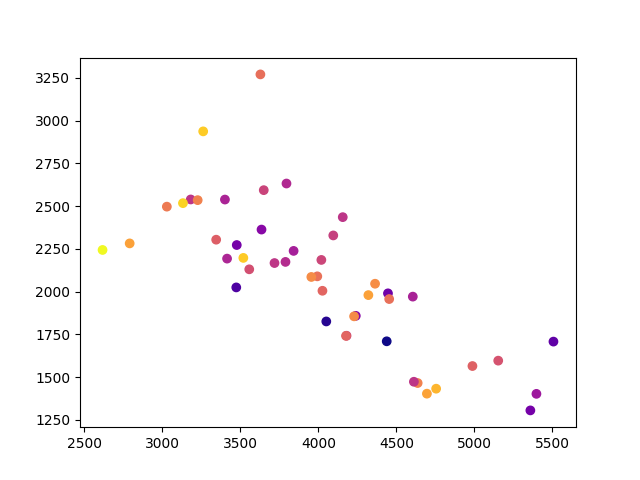

In [98]:
fig,ax=plt.subplots()
ax.scatter(points[:,0],points[:,1],c=rgb_colors)

In [51]:
list(points)

[array([3556.57894737, 2130.45112782, 3990.78947368]),
 array([3649.57627119, 2593.43220339, 4018.22033898]),
 array([3400.63291139, 2538.44936709, 3970.09493671]),
 array([4446.01226994, 1989.87730061, 4592.33128834]),
 array([3181.25      , 2538.98026316, 4237.33552632]),
 array([3795.24647887, 2632.21830986, 4073.06338028]),
 array([3841.02209945, 2238.12154696, 4089.77900552]),
 array([3788.81909548, 2173.74371859, 4071.10552764]),
 array([3225.90909091, 2535.        , 4330.15151515]),
 array([4018.89312977, 2185.30534351, 4304.19847328]),
 array([3992.91044776, 2089.36567164, 4497.76119403]),
 array([4363.28125   , 2046.09375   , 4351.04166667]),
 array([4605.28846154, 1970.67307692, 4555.76923077]),
 array([4453.84615385, 1956.53846154, 4767.30769231]),
 array([4239.71774194, 1858.26612903, 4279.83870968]),
 array([4228.80434783, 1855.43478261, 4417.39130435]),
 array([3954.64285714, 2085.71428571, 4393.21428571]),
 array([4987.61682243, 1564.71962617, 4708.41121495]),
 array([32

In [52]:
ccf = CCFWidget(selected_acronyms=sel_area, markers=[points])

ccf

CCFWidget(children=(VBox(children=(Viewer(background=(0.85, 0.85, 0.85), camera=array([[ 1.3441567e+03, -2.172…

[array([3556.57894737, 2130.45112782, 3990.78947368])]

In [58]:
separate_points=[]
for i in range(len(points)):
    sub_points=[]

    sub_points.append(points[i,:])
    sub_points.append(points[i,:])
    sub_points=np.vstack(sub_points)

    separate_points.append(sub_points)

In [59]:
separate_points

[array([[3556.57894737, 2130.45112782, 3990.78947368],
        [3556.57894737, 2130.45112782, 3990.78947368]]),
 array([[3649.57627119, 2593.43220339, 4018.22033898],
        [3649.57627119, 2593.43220339, 4018.22033898]]),
 array([[3400.63291139, 2538.44936709, 3970.09493671],
        [3400.63291139, 2538.44936709, 3970.09493671]]),
 array([[4446.01226994, 1989.87730061, 4592.33128834],
        [4446.01226994, 1989.87730061, 4592.33128834]]),
 array([[3181.25      , 2538.98026316, 4237.33552632],
        [3181.25      , 2538.98026316, 4237.33552632]]),
 array([[3795.24647887, 2632.21830986, 4073.06338028],
        [3795.24647887, 2632.21830986, 4073.06338028]]),
 array([[3841.02209945, 2238.12154696, 4089.77900552],
        [3841.02209945, 2238.12154696, 4089.77900552]]),
 array([[3788.81909548, 2173.74371859, 4071.10552764],
        [3788.81909548, 2173.74371859, 4071.10552764]]),
 array([[3225.90909091, 2535.        , 4330.15151515],
        [3225.90909091, 2535.        , 4330.15151

In [104]:
#convert colors to RGB?
rgb_colors = []
for i in decoder_acc:
    rgb_colors.append(plt.cm.plasma((i-np.min(decoder_acc))/np.max(decoder_acc-np.min(decoder_acc)))[:3])

In [97]:
# (decoder_acc-np.min(decoder_acc))/np.max(decoder_acc-np.min(decoder_acc))
rgb_colors

[(0.823132, 0.311261, 0.444806),
 (0.787133, 0.266922, 0.480307),
 (0.665129, 0.138566, 0.585582),
 (0.429719, 0.000831, 0.659425),
 (0.736019, 0.209439, 0.527908),
 (0.688318, 0.160709, 0.568103),
 (0.645872, 0.120898, 0.598867),
 (0.701769, 0.174005, 0.557296),
 (0.944844, 0.507658, 0.302433),
 (0.794549, 0.27577, 0.473117),
 (0.9128, 0.444029, 0.346251),
 (0.963203, 0.553865, 0.271909),
 (0.660374, 0.134144, 0.588971),
 (0.910098, 0.439268, 0.34961),
 (0.534952, 0.031217, 0.650165),
 (0.959424, 0.543431, 0.278701),
 (0.961336, 0.548636, 0.275305),
 (0.872303, 0.378774, 0.393355),
 (0.990439, 0.796859, 0.14787),
 (0.930798, 0.477867, 0.322697),
 (0.991209, 0.790537, 0.149377),
 (0.985301, 0.63533, 0.221265),
 (0.779604, 0.258078, 0.487539),
 (0.833422, 0.324635, 0.434366),
 (0.907365, 0.434524, 0.35297),
 (0.740143, 0.213864, 0.524216),
 (0.866078, 0.36966, 0.400126),
 (0.984199, 0.629718, 0.224595),
 (0.985314, 0.828846, 0.142945),
 (0.534952, 0.031217, 0.650165),
 (0.940015, 0.9751

In [71]:
colors=[]
for i in range(len(decoder_acc)):
    colors.append(10)

In [106]:
ccf = CCFWidget(selected_acronyms=sel_area)#, markers=separate_points, marker_colors=rgb_colors)
ccf.markers = separate_points
# ccf.marker_colors = rgb_colors
ccf.itk_viewer.point_set_colors = rgb_colors
ccf

CCFWidget(children=(VBox(children=(Viewer(background=(0.85, 0.85, 0.85), camera=array([[ 1.3441567e+03, -2.172…

In [110]:
for cc in range(len(rgb_colors)):
    ccf.itk_viewer.point_set_colors[cc] = rgb_colors[cc]
ccf

CCFWidget(children=(VBox(children=(Viewer(background=(0.85, 0.85, 0.85), camera=array([[ 1.3441567e+03, -2.172…

In [101]:
ccf.itk_viewer.point_set_colors

array([[8.23132e-01, 3.11261e-01, 4.44806e-01],
       [7.87133e-01, 2.66922e-01, 4.80307e-01],
       [6.65129e-01, 1.38566e-01, 5.85582e-01],
       [4.29719e-01, 8.31000e-04, 6.59425e-01],
       [7.36019e-01, 2.09439e-01, 5.27908e-01],
       [6.88318e-01, 1.60709e-01, 5.68103e-01],
       [6.45872e-01, 1.20898e-01, 5.98867e-01],
       [7.01769e-01, 1.74005e-01, 5.57296e-01],
       [9.44844e-01, 5.07658e-01, 3.02433e-01],
       [7.94549e-01, 2.75770e-01, 4.73117e-01],
       [9.12800e-01, 4.44029e-01, 3.46251e-01],
       [9.63203e-01, 5.53865e-01, 2.71909e-01],
       [6.60374e-01, 1.34144e-01, 5.88971e-01],
       [9.10098e-01, 4.39268e-01, 3.49610e-01],
       [5.34952e-01, 3.12170e-02, 6.50165e-01],
       [9.59424e-01, 5.43431e-01, 2.78701e-01],
       [9.61336e-01, 5.48636e-01, 2.75305e-01],
       [8.72303e-01, 3.78774e-01, 3.93355e-01],
       [9.90439e-01, 7.96859e-01, 1.47870e-01],
       [9.30798e-01, 4.77867e-01, 3.22697e-01],
       [9.91209e-01, 7.90537e-01, 1.4937

In [78]:
ccf.marker_colors

[(0.951344, 0.52285, 0.292275),
 (0.944844, 0.507658, 0.302433),
 (0.923287, 0.463251, 0.332801),
 (0.887402, 0.401762, 0.376494),
 (0.93563, 0.487712, 0.315952),
 (0.925825, 0.468103, 0.329435),
 (0.920714, 0.458417, 0.336166),
 (0.928329, 0.472975, 0.326067),
 (0.973416, 0.585761, 0.25154),
 (0.944844, 0.507658, 0.302433),
 (0.966798, 0.564396, 0.265118),
 (0.977856, 0.602051, 0.241387),
 (0.923287, 0.463251, 0.332801),
 (0.966798, 0.564396, 0.265118),
 (0.901807, 0.425087, 0.359688),
 (0.976428, 0.596595, 0.244767),
 (0.977856, 0.602051, 0.241387),
 (0.959424, 0.543431, 0.278701),
 (0.990681, 0.669558, 0.201642),
 (0.970205, 0.575028, 0.258325),
 (0.990681, 0.669558, 0.201642),
 (0.983041, 0.624131, 0.227937),
 (0.942598, 0.502639, 0.305816),
 (0.951344, 0.52285, 0.292275),
 (0.966798, 0.564396, 0.265118),
 (0.93563, 0.487712, 0.315952),
 (0.957469, 0.53825, 0.282096),
 (0.983041, 0.624131, 0.227937),
 (0.991985, 0.681179, 0.195295),
 (0.901807, 0.425087, 0.359688),
 (0.994474, 0.72

In [73]:
colors

[10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10]

In [65]:
ccf.itk_viewer.point_set_colors = rgb_colors
ccf

CCFWidget(children=(VBox(children=(Viewer(background=(0.85, 0.85, 0.85), camera=array([[ 1.3441567e+03, -2.172…

In [62]:
rgb_colors

[(0.951344, 0.52285, 0.292275),
 (0.944844, 0.507658, 0.302433),
 (0.923287, 0.463251, 0.332801),
 (0.887402, 0.401762, 0.376494),
 (0.93563, 0.487712, 0.315952),
 (0.925825, 0.468103, 0.329435),
 (0.920714, 0.458417, 0.336166),
 (0.928329, 0.472975, 0.326067),
 (0.973416, 0.585761, 0.25154),
 (0.944844, 0.507658, 0.302433),
 (0.966798, 0.564396, 0.265118),
 (0.977856, 0.602051, 0.241387),
 (0.923287, 0.463251, 0.332801),
 (0.966798, 0.564396, 0.265118),
 (0.901807, 0.425087, 0.359688),
 (0.976428, 0.596595, 0.244767),
 (0.977856, 0.602051, 0.241387),
 (0.959424, 0.543431, 0.278701),
 (0.990681, 0.669558, 0.201642),
 (0.970205, 0.575028, 0.258325),
 (0.990681, 0.669558, 0.201642),
 (0.983041, 0.624131, 0.227937),
 (0.942598, 0.502639, 0.305816),
 (0.951344, 0.52285, 0.292275),
 (0.966798, 0.564396, 0.265118),
 (0.93563, 0.487712, 0.315952),
 (0.957469, 0.53825, 0.282096),
 (0.983041, 0.624131, 0.227937),
 (0.991985, 0.681179, 0.195295),
 (0.901807, 0.425087, 0.359688),
 (0.994474, 0.72

In [14]:
list(decoder_acc)

[0.7032830558431239,
 0.6916561082412365,
 0.6571821886842958,
 0.6067195356939543,
 0.6766903764633786,
 0.6634270195507898,
 0.6527486224469777,
 0.6664906004629824,
 0.7524326150400995,
 0.6933403764725639,
 0.7373204829510444,
 0.7633428035057962,
 0.6562781731502622,
 0.735691470242389,
 0.6286440559513718,
 0.7607956808052566,
 0.7619443525062486,
 0.7213116537659866,
 0.811773006279141,
 0.7455252785857727,
 0.8110277352437548,
 0.7808971850112695,
 0.6896997973847777,
 0.7065019947079739,
 0.7345118607698384,
 0.6779847139634256,
 0.7186845993668475,
 0.7797409314471027,
 0.8180621928782361,
 0.628277999020728,
 0.8446008552990647,
 0.7530283210995269,
 0.7799813729056407,
 0.7962542358988636,
 0.6868881657987858,
 0.6463488711148447,
 0.6763340248425108,
 0.6127768068994206,
 0.6760804140647524,
 0.7257743551159909,
 0.6598531221564125,
 0.5969422149428047,
 0.6124639510128109,
 0.5837127058446735,
 0.5569925134035175,
 0.54430102727871,
 0.7252621736401643]